In [1]:
import numpy as np
from matplotlib import pyplot as plt

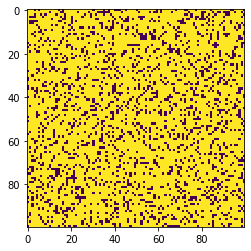

In [2]:
np.random.seed(19)
L=100
C=100
maze = (np.random.uniform(size=(L,C)) > 0.2) * 1
maze[0,0]=1
maze[-1,-1]=1
plt.imshow(maze)
plt.show()

In [3]:
traffictime = np.zeros((L,C,24))
np.random.seed(19)
Distance = 1
for i in range(L):
    for j in range(C):
        for k in range(24):
            if maze[i][j]==1:
                if ((k>=0) & (k<7)):
                    traffictime[i][j][k] = Distance/np.random.uniform(50,80)
                elif ((k>=7) & (k<10)):
                    prob = np.random.uniform(0,1)
                    if prob <= 0.65:
                        traffictime[i][j][k] = Distance/np.random.uniform(0.01,0.5)
                    elif (prob > 0.65) and (prob <= 1) :
                        traffictime[i][j][k] = Distance/np.random.uniform(80,100)
                    else:
                        traffictime[i][j][k] = Distance/np.random.uniform(30,60)
                elif ((k>=10) & (k<16)):
                    traffictime[i][j][k] = Distance/np.random.uniform(20,60)
                elif ((k>=16) & (k<21)):
                    prob = np.random.uniform(0,1)
                    if prob <= 0.65:
                        traffictime[i][j][k] = Distance/np.random.uniform(0.01,0.5)
                    elif (prob > 0.65) and (prob <= 0.1) :
                        traffictime[i][j][k] = Distance/np.random.uniform(80,100)
                    else:
                        traffictime[i][j][k] = Distance/np.random.uniform(80,100)
                elif ((k>=21) & (k<24)):
                    traffictime[i][j][k] = Distance/np.random.uniform(30,60)

In [4]:
def MinArray(arr,k,L,C):
    minvalue = 100000
    for i in range(L):
        for j in range(C):
            if (minvalue > arr[i][j]) and (arr[i][j] > k) :
                minvalue = arr[i][j]
    if minvalue != 100000:
        return minvalue
    else:
        return k

In [5]:
starttime = 7
begx =0
begy =0
endx =-1
endy =-1
Ending = np.zeros((L,C))
Starting = np.zeros((L,C))
Ending[begx][begy] = starttime + traffictime[begx][begy][int(starttime)]
time = Ending[begx][begy]
Starting[begx][begy]=starttime
iteratorstep =0
######################short distance from one point to another############################
while Ending[endx,endy]==0: 
    if iteratorstep==L*C+1:
        print('WARNING: There is no road available to destination')
        break
    for i in range(L):
        for j in range(C):
            if Ending[i,j]==time:
                if j<C-1:
                    if maze[i,j+1]==1 or maze[i,j+1]==3:
                        if Ending[i,j+1]==0:
                            Ending[i,j+1]=Ending[i][j]+ traffictime[i][j+1][int(Ending[i][j])%24]
                            Starting[i][j+1]= Ending[i][j]
                if j>0:
                    if maze[i,j-1]==1 or maze[i,j-1]==3:
                        if Ending[i,j-1]==0:
                            Ending[i,j-1]=Ending[i][j]+ traffictime[i][j-1][int(Ending[i][j])%24]
                            Starting[i][j-1]= Ending[i][j]
                if i <L-1:        
                    if maze[i+1,j]==1 or maze[i+1,j]==3 :
                        if Ending[i+1,j]==0:
                            Ending[i+1,j]=Ending[i][j]+ traffictime[i+1][j][int(Ending[i][j])%24]
                            Starting[i+1][j]= Ending[i][j]
                if i>0:
                    if maze[i-1,j]==1 or maze[i-1,j]==3 :
                        if Ending[i-1,j]==0:
                            Ending[i-1,j]=Ending[i][j]+ traffictime[i-1][j][int(Ending[i][j])%24]
                            Starting[i-1][j]= Ending[i][j]
    time = MinArray(Ending,time,L,C)
    iteratorstep=iteratorstep+1
print(Ending)

[[ 7.01003464  7.02239812 20.543867   ... 13.37563944 13.40775456
   0.        ]
 [ 7.0203701  10.31335874 10.34274368 ... 13.34802848  0.
   0.        ]
 [ 7.03228172  7.04284363 10.87370504 ... 13.33597614 13.37966462
   0.        ]
 ...
 [13.15549958  0.         13.11119739 ... 14.8194447   0.
  14.88009682]
 [13.17658599 13.16282788 13.14537867 ... 14.81399323 14.83302787
  14.8536494 ]
 [ 0.         13.19550844 13.161088   ... 14.82115041  0.
  14.89468471]]


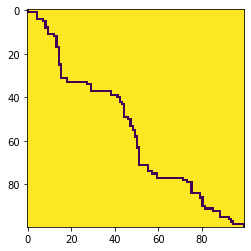

In [6]:
Direction = np.zeros((L,C))
iteratorstepprint = 0
Direction[endx,endy] = -1
timepassed = Ending[endx][endy]

while Direction[begx,begy]==0: 
    if iteratorstepprint==L*C+1:
        print('WARNING: There is no road available to destination')
        break
    for i in range(L):
        for j in range(C):
            if Ending[i,j]==timepassed:
                if j<C-1:
                    if (Ending[i,j+1]==Starting[i][j]) and Direction[i][j+1]==0 :
                        Direction[i][j+1] = -1
                        timepassed = Ending[i,j+1] 
                if j>0:
                    if (Ending[i,j-1]==Starting[i][j]) and Direction[i][j-1]==0 :
                        Direction[i][j-1] = -1
                        timepassed = Ending[i,j-1] 
                if i <L-1:        
                    if (Ending[i+1,j]==Starting[i][j]) and Direction[i+1][j]==0 :
                        Direction[i+1][j] = -1
                        timepassed = Ending[i+1,j]
                if i>0:
                    if (Ending[i-1,j]==Starting[i][j]) and Direction[i-1][j]==0 :
                        Direction[i-1][j] = -1
                        timepassed = Ending[i-1,j]
    iteratorstep=iteratorstep+1
plt.imshow(Direction)
plt.show()

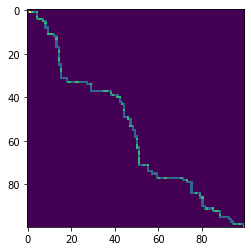

In [7]:
Traffic = np.zeros((L,C))
for i in range(L):
        for j in range(C):
            if Direction[i,j]==-1:
                if (Ending[i][j] - Starting[i][j]) >= Distance/20:
                    Traffic[i][j]=3
                elif ((Ending[i][j] - Starting[i][j]) >= Distance/40) and ((Ending[i][j] - Starting[i][j]) < Distance/20):
                    Traffic[i][j]=2
                else:
                    Traffic[i][j]=1
plt.imshow(Traffic)
plt.show()